In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.utils import resample
from collections import Counter

In [2]:
cd tripadvisor/reviews/csv

/home/joanna_huang/W266-Final-Project/tripadvisor/reviews/csv


In [3]:
filepath = ['Chicago_Illinois_1.csv','Chicago_Illinois_2.csv', 'Las_Vegas_Nevada_1.csv', 'Las_Vegas_Nevada_2.csv',
'Las_Vegas_Nevada_3.csv','Las_Vegas_Nevada_4.csv','Las_Vegas_Nevada_5.csv', 'Las_Vegas_Nevada_6.csv',
'Las_Vegas_Nevada_7.csv', 'New_York_City_New_York_1.csv', 'New_York_City_New_York_2.csv', 
'New_York_City_New_York_3.csv', 'New_York_City_New_York_4.csv', 'New_York_City_New_York_5.csv',
'New_York_City_New_York_6.csv', 'New_York_City_New_York_7.csv', 'San_Francisco_California_1.csv',
'San_Francisco_California_2.csv']

data = pd.DataFrame()
for path in filepath:
    df = pd.read_csv(path)
    df['city'] = path.split('_')[0]
    data = data.append(df)
data.shape #(968772, 19)
data = data.reset_index(drop=True)
del data['neighborhood'] #remove column given 80+% null
data['review_body'] = [x.lower() for x in data['review_body']]
data['review_body'] = [x.split('.') for x in data['review_body']]

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
cd

/home/joanna_huang


In [5]:
cd W266-Final-Project/LIWC

/home/joanna_huang/W266-Final-Project/LIWC


In [6]:
df2 = pd.read_csv('df2.fixed')
df2['affect'] = df2['affect']*0.01
df2['posemo'] = df2['posemo']*0.01
df2['negemo'] = df2['negemo']*0.01
df2['anx'] = df2['anx']*0.01
df2['anger'] = df2['anger']*0.01
df2['sad'] = df2['sad']*0.01
df2['cogproc'] = df2['cogproc']*0.01
df2['insight'] = df2['insight']*0.01
df2['cause'] = df2['cause']*0.01
df2['discrep'] = df2['discrep']*0.01
df2['tentat'] = df2['tentat']*0.01
df2['certain'] = df2['certain']*0.01
df2['differ'] = df2['differ']*0.01

In [8]:
df2['disgust_log_mean'] = np.log(df2['Disgust']+np.mean(df2['Disgust']))
df2['joy_log_mean'] = np.log(df2['Joy']+np.mean(df2['Joy']))
df2['sad_log_mean'] = np.log(df2['Sad']+np.mean(df2['Sad']))
df2['affect_log_mean'] = np.log(df2['affect']+np.mean(df2['affect']))
df2['cogproc_log_mean'] = np.log(df2['cogproc']+np.mean(df2['cogproc']))
df2['fp_log_mean'] = np.log(df2['First Person']+np.mean(df2['First Person']))
df2['tp_log_mean'] = np.log(df2['Third Person']+np.mean(df2['Third Person']))
df2['negemo_log_mean'] = np.log(df2['negemo']+np.mean(df2['negemo']))
df2['narr_log_mean'] = np.log(df2['Narrative Seq']+np.mean(df2['Narrative Seq']))
df2['past_log_mean'] = np.log(df2['Past Tense']+np.mean(df2['Past Tense']))

In [9]:
df = df2[['Word_Count','Helpful', 'city', 'class', 'activity_level',
         'fp_log_mean', 'tp_log_mean', 'negemo_log_mean', 'affect_log_mean', 'joy_log_mean', 'disgust_log_mean',
          'sad_log_mean','narr_log_mean', 'past_log_mean','spatial', 'temporal','Polarity2', 'cogproc_log_mean', 
          'Comparatives','money']]
# calculate the correlation matrix
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,Word_Count,Helpful,city,class,activity_level,fp_log_mean,tp_log_mean,negemo_log_mean,affect_log_mean,joy_log_mean,disgust_log_mean,sad_log_mean,narr_log_mean,past_log_mean,spatial,temporal,Polarity2,cogproc_log_mean,Comparatives,money
Word_Count,1,0.12,0.024,0.022,0.12,0.15,0.22,0.18,-0.23,-0.23,0.17,0.1,0.24,0.13,0.17,0.34,-0.26,0.12,0.014,-0.036
Helpful,0.12,1,0.00011,0.019,0.42,-0.0014,0.02,0.018,-0.037,-0.042,0.015,0.019,0.016,-0.015,0.019,0.043,-0.039,0.011,0.012,0.0047
city,0.024,0.00011,1,0.042,-0.0014,-0.017,0.045,0.084,-0.1,-0.048,0.069,0.17,0.026,0.0079,0.018,0.055,-0.061,0.096,0.023,0.2
class,0.022,0.019,0.042,1,0.022,0.017,-0.022,-0.043,0.029,0.041,-0.038,-0.019,-0.002,-0.04,0.045,0.0051,0.12,-0.0075,-0.018,-0.029
activity_level,0.12,0.42,-0.0014,0.022,1,-0.023,0.027,0.016,-0.059,-0.063,0.011,0.029,0.011,-0.039,0.027,0.051,-0.055,0.014,0.022,0.013
fp_log_mean,0.15,-0.0014,-0.017,0.017,-0.023,1,0.081,-0.0021,-0.054,-0.037,-7.9e-05,-0.012,0.14,0.34,0.018,0.11,-0.017,-0.03,-0.038,-0.13
tp_log_mean,0.22,0.02,0.045,-0.022,0.027,0.081,1,0.13,-0.14,-0.16,0.11,0.053,0.15,0.13,0.045,0.18,-0.17,0.13,-0.0011,-0.024
negemo_log_mean,0.18,0.018,0.084,-0.043,0.016,-0.0021,0.13,1,-0.03,-0.24,0.45,0.35,0.12,0.13,0.098,0.16,-0.45,0.18,0.042,0.041
affect_log_mean,-0.23,-0.037,-0.1,0.029,-0.059,-0.054,-0.14,-0.03,1,0.39,-0.11,-0.045,-0.16,-0.09,-0.21,-0.34,0.39,-0.19,-0.026,-0.027
joy_log_mean,-0.23,-0.042,-0.048,0.041,-0.063,-0.037,-0.16,-0.24,0.39,1,-0.17,-0.079,-0.18,-0.12,-0.091,-0.2,0.45,-0.12,-0.066,0.019


In [9]:
df = df2[['Word_Count','Helpful', 'city', 'class', 'activity_level',
         'Third Person', 'First Person', 'negemo', 'affect', 'Joy', 'Disgust','Sad',
         'Narrative Seq', 'Past Tense','spatial', 'temporal','Polarity2', 'cogproc', 'Comparatives',
        'money']]
# calculate the correlation matrix
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,Word_Count,Helpful,city,class,activity_level,Third Person,First Person,negemo,affect,Joy,Disgust,Sad,Narrative Seq,Past Tense,spatial,temporal,Polarity2,cogproc,Comparatives,money
Word_Count,1,0.12,0.024,0.022,0.12,0.15,0.1,0.054,-0.16,-0.26,0.045,0.0047,0.15,0.093,0.17,0.34,-0.26,0.083,0.014,-0.036
Helpful,0.12,1,0.00011,0.019,0.42,0.0073,-0.011,0.00092,-0.028,-0.049,-0.0048,0.003,-0.00073,-0.023,0.019,0.043,-0.039,0.0066,0.012,0.0047
city,0.024,0.00011,1,0.042,-0.0014,0.046,-0.019,0.014,-0.11,-0.037,0.064,0.17,0.029,0.015,0.018,0.055,-0.061,0.057,0.023,0.2
class,0.022,0.019,0.042,1,0.022,-0.024,0.017,-0.029,0.012,0.038,-0.051,-0.024,-0.0052,-0.042,0.045,0.0051,0.12,-0.0093,-0.018,-0.029
activity_level,0.12,0.42,-0.0014,0.022,1,0.0078,-0.037,-0.0064,-0.045,-0.075,-0.016,0.0054,-0.011,-0.05,0.027,0.051,-0.055,0.0061,0.022,0.013
Third Person,0.15,0.0073,0.046,-0.024,0.0078,1,0.051,0.055,-0.078,-0.14,0.063,0.017,0.12,0.12,0.025,0.14,-0.15,0.1,-0.0043,-0.017
First Person,0.1,-0.011,-0.019,0.017,-0.037,0.051,1,-0.013,-0.018,-0.039,-0.032,-0.043,0.12,0.32,-0.00073,0.082,-0.002,-0.035,-0.04,-0.13
negemo,0.054,0.00092,0.014,-0.029,-0.0064,0.055,-0.013,1,0.2,-0.11,0.25,0.18,0.051,0.062,-0.038,-0.009,-0.25,0.045,0.02,0.023
affect,-0.16,-0.028,-0.11,0.012,-0.045,-0.078,-0.018,0.2,1,0.28,-0.049,-0.013,-0.086,-0.054,-0.27,-0.35,0.27,-0.085,-0.02,-0.033
Joy,-0.26,-0.049,-0.037,0.038,-0.075,-0.14,-0.039,-0.11,0.28,1,-0.13,-0.036,-0.15,-0.1,-0.099,-0.22,0.44,-0.1,-0.066,0.024


### All Variables

Features of Narrative Content from What Happens in Vegas...
- affect: from LIWC, words of feeling
- cogproc: from LIWC, words of cognition
- spatial: from LIWC, an ordinal variable that signified the level at which a review was spatially embedded, coded as (0) neither space nor perceptual process unigrams (i.e., single words), (1) space unigrams but no perceptual process unigrams, or (2) space and perceptual process unigrams. As perceptual processes require space to be pinpointed but space does not require its attributes to be pinpointed, space unigrams can occur alone or with perceptual process unigrams, but perceptual process unigrams should always occur with space unigrams.
- temporal: from LIWC, a categorical variable that signified the level at which a review was temporally embedded, coded as (0) neither time nor causation unigrams, (1) either time or causation unigrams, or (2) both time and causation unigrams.

Features of Trauma from Jurafsky paper:
- Third Person: count of third person words: 'he','she','it','him','her','his','hers','its','they', 'them','their','theirs'
- First Person: count of first person words: 'we','us','our'
- negemo: from LIWC, words of negative emotion
- Narrative Seq: count of speech and sequence words: 'say','tell','said','told','saying','telling','then', 'after', 'before','initially', 'first','next', 'while', 'during', 'finally', 'eventually','end', 'start'
- Past Tense: from NLTK part of speech tagging - past tense words

Features of Plutchik's Emotions
- Fear: from NRC
- Trust: from NRC
- Sad: from NRC

TextBlob scores:
- Subjectivity
- Polarity2

#### Percentages

In [23]:
y = df2['Rating']
# Controls: word count, helpful, city, class, popularity, activity level

X = df2[['Word_Count','Helpful', 'city', 'class', 'activity_level',
         'Third Person', 'First Person', 'negemo', 'affect', 'Joy', 'Disgust','Sad',
         'Narrative Seq', 'Past Tense','spatial', 'temporal','Polarity2', 'cogproc']]
        
#X = df2[['Word_Count','Helpful', 'city', 'class', 'activity_level',
         #'fp_log_mean', 'tp_log_mean', 'negemo_log_mean', 'affect_log_mean', 'joy_log_mean', 'disgust_log_mean',
         # 'sad_log_mean','narr_log_mean', 'past_log_mean','spatial', 'temporal','Polarity2', 'cogproc_log_mean', 
         # 'Comparatives','money']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


In [17]:
# Logistic Regression
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(metrics.classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.58
[[ 22130    142   4707   6158]
 [  9907    141  11431  17548]
 [  4096     75  17927  63199]
 [  2113     29  11097 138371]]
             precision    recall  f1-score   support

          0       0.58      0.67      0.62     33137
          1       0.36      0.00      0.01     39027
          2       0.40      0.21      0.27     85297
          3       0.61      0.91      0.73    151610

avg / total       0.52      0.58      0.50    309071



In [18]:
# Ordinal Regression Model https://pythonhosted.org/mord/
import mord
ordreg = mord.LogisticIT(alpha=1)
ordreg.fit(X_train, y_train)
y_pred_ord = ordreg.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_ord)
print(confusion_matrix)
print(metrics.classification_report(y_test, y_pred_ord))
print(metrics.accuracy_score(y_test, y_pred_ord))

[[ 19375   1180  10111   2471]
 [  9228   1084  17314  11401]
 [  4101    773  24995  55428]
 [  1662    347  19543 130058]]
             precision    recall  f1-score   support

          0       0.56      0.58      0.57     33137
          1       0.32      0.03      0.05     39027
          2       0.35      0.29      0.32     85297
          3       0.65      0.86      0.74    151610

avg / total       0.52      0.57      0.52    309071

0.5678695186542898


In [ ]:
y_common = [3]*309071
print(metrics.accuracy_score(y_test, y_common))
print(metrics.accuracy_score(y_test, y_pred_mul))

In [28]:
# Multinomial Logistic Regression
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
y_pred_mul = mul_lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mul)
print(confusion_matrix)
print(metrics.classification_report(y_test, y_pred_mul))
print(metrics.accuracy_score(y_test, y_pred_mul))

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[[ 22001   3728   3051   4357]
 [  9623   5040  10420  13944]
 [  3930   3527  20785  57055]
 [  2061   1841  14951 132757]]
             precision    recall  f1-score   support

          0       0.58      0.66      0.62     33137
          1       0.36      0.13      0.19     39027
          2       0.42      0.24      0.31     85297
          3       0.64      0.88      0.74    151610

avg / total       0.54      0.58      0.54    309071

0.5842767519437282


### Model Coefficients
Interpretation: https://docs.google.com/document/d/1cTSpNbunbgFto-up56hBfG3dJgyppbjhPM2jtCdJ-eM/edit?usp=sharing

In [ ]:
#print(round(np.exp(4.6),2))

In [29]:
import statsmodels.api as st
mdl = st.MNLogit(y_train, X_train)
mdl_fit = mdl.fit()
print(mdl_fit.summary())

         Current function value: 0.917146
         Iterations: 35


/home/joanna_huang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                          MNLogit Regression Results                          
Dep. Variable:                 Rating   No. Observations:               721165
Model:                        MNLogit   Df Residuals:                   721111
Method:                           MLE   Df Model:                           51
Date:                Sun, 09 Dec 2018   Pseudo R-squ.:                  0.2391
Time:                        00:58:16   Log-Likelihood:            -6.6141e+05
converged:                      False   LL-Null:                   -8.6929e+05
                                        LLR p-value:                     0.000
      Rating=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Word_Count        -0.0010   3.79e-05    -25.395      0.000      -0.001      -0.001
Helpful            0.0007      0.000      4.687      0.000       0.000       0.001
city              -0.0238      0.005

## Multinomial Logistic Regression Assumptions
https://statistics.laerd.com/spss-tutorials/multinomial-logistic-regression-using-spss-statistics.php

### Multicollinearity
Related Links:
-https://statisticalhorizons.com/multicollinearity
-https://etav.github.io/python/vif_factor_python.html

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
vif["features"] = X_test.columns
vif

,VIF Factor,features
0,2.571850,Word_Count
1,1.301501,Helpful
2,7.143577,city
3,19.490252,class
4,6.859009,activity_level
5,2.080782,Third Person
6,1.808486,First Person
7,1.325949,negemo
8,2.765839,affect
9,3.435501,Joy


### Linearity Assumption - Predictors should have a linear relationship with logit of outcome

In [33]:
prediction_table = pd.DataFrame()
prediction_table['actual'] = y_test
prediction_table['y_pred_mul'] = y_pred_mul
prediction_table['0'] = y_pred_10
prediction_table['1'] = y_pred_20
prediction_table['2'] = y_pred_30
prediction_table['3'] = y_pred_40
prediction_table['probability'] = prediction_table[["0", "1","2", "3"]].max(axis=1)
prediction_table['logit']=np.exp(prediction_table['probability'])/ np.exp(1-prediction_table['probability'])

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


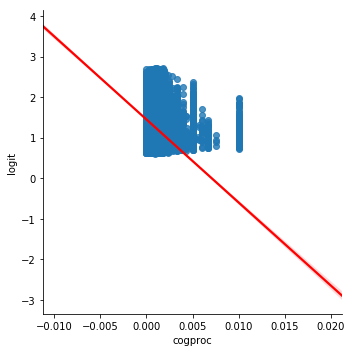

In [34]:
plot_data = pd.DataFrame()
plot_data = X_test
plot_data['logit'] = prediction_table['logit']

ax = sns.lmplot(x='cogproc', y='logit', data=plot_data, line_kws={'color': 'red'})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


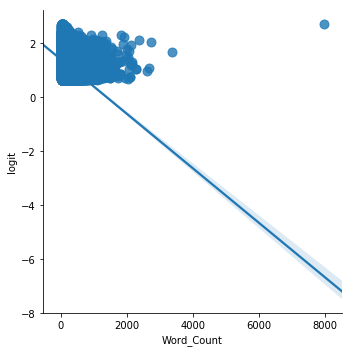

In [35]:
ax = sns.lmplot(x='Word_Count', y='logit', data=plot_data, scatter_kws={"s": 80})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


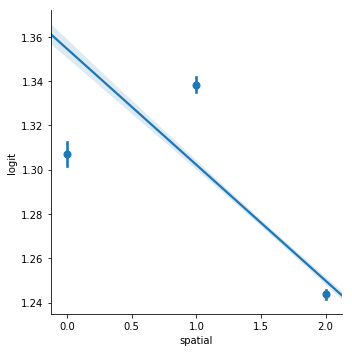

In [36]:
ax = sns.lmplot(x="spatial", y="logit", data=plot_data, x_estimator=np.mean)

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


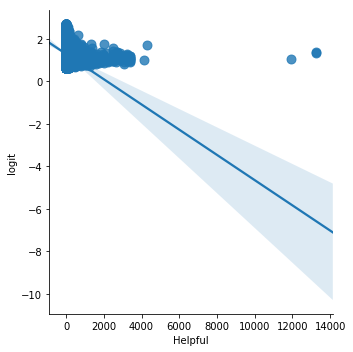

In [37]:
ax = sns.lmplot(x='Helpful', y='logit', data=plot_data, scatter_kws={"s": 80})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


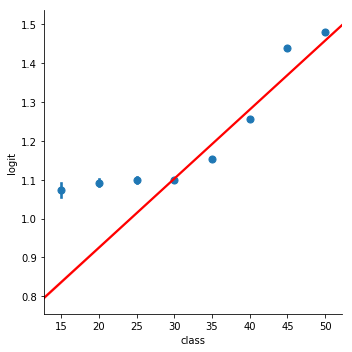

In [38]:
ax = sns.lmplot(x='class', y='logit', data=plot_data, line_kws={'color': 'red'}, x_estimator=np.mean)

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


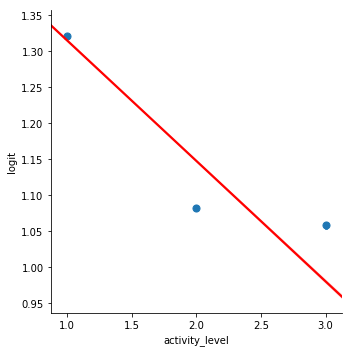

In [39]:
ax = sns.lmplot(x='activity_level', y='logit', data=plot_data, line_kws={'color': 'red'},x_estimator=np.mean)

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


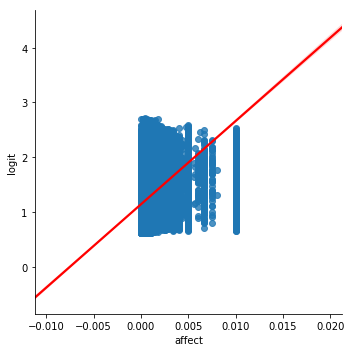

In [40]:
ax = sns.lmplot(x='affect', y='logit', data=plot_data, line_kws={'color': 'red'})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


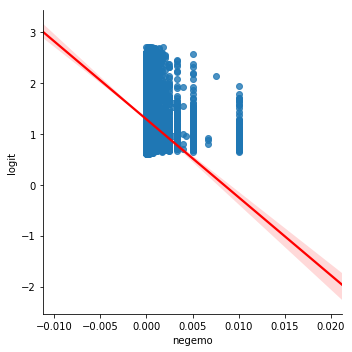

In [41]:
ax = sns.lmplot(x='negemo', y='logit', data=plot_data, line_kws={'color': 'red'})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


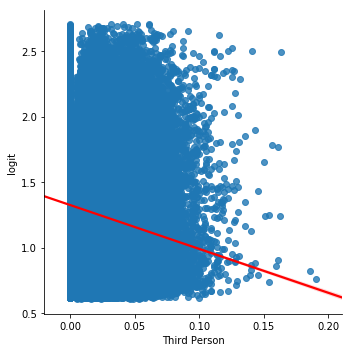

In [42]:
ax = sns.lmplot(x='Third Person', y='logit', data=plot_data, line_kws={'color': 'red'})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


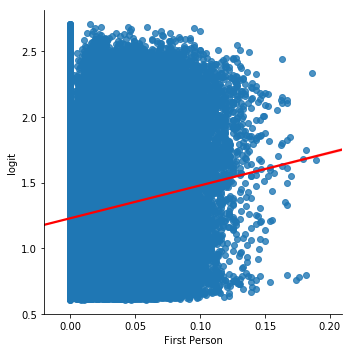

In [43]:
ax = sns.lmplot(x='First Person', y='logit', data=plot_data, line_kws={'color': 'red'})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


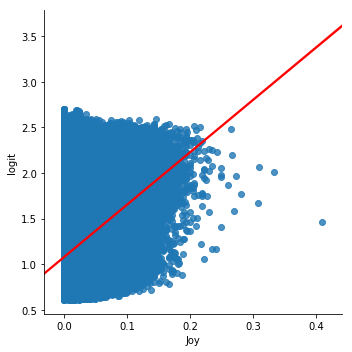

In [44]:
ax = sns.lmplot(x='Joy', y='logit', data=plot_data, line_kws={'color': 'red'})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


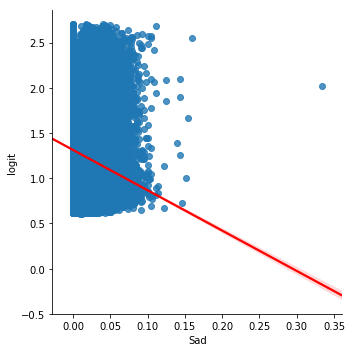

In [45]:
ax = sns.lmplot(x='Sad', y='logit', data=plot_data, line_kws={'color': 'red'})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


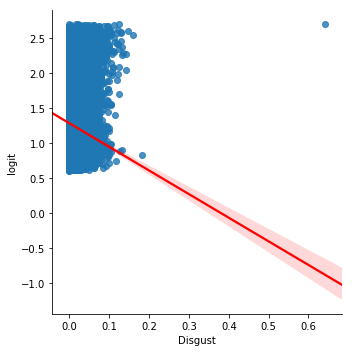

In [46]:
ax = sns.lmplot(x='Disgust', y='logit', data=plot_data, line_kws={'color': 'red'})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


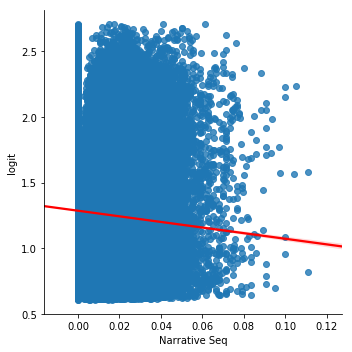

In [47]:
ax = sns.lmplot(x='Narrative Seq', y='logit', data=plot_data, line_kws={'color': 'red'})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


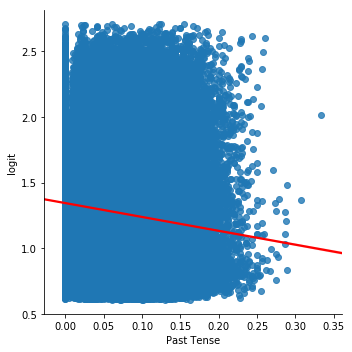

In [48]:
ax = sns.lmplot(x='Past Tense', y='logit', data=plot_data, line_kws={'color': 'red'})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


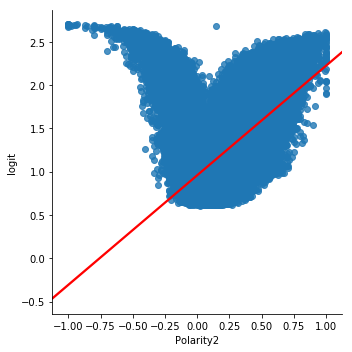

In [49]:
ax = sns.lmplot(x='Polarity2', y='logit', data=plot_data, line_kws={'color': 'red'})

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/joanna_huang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/home/joanna_huang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/joanna_huang/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/joanna_huang/anaconda3/lib/pyt

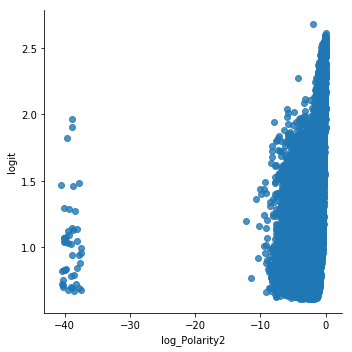

In [50]:
plot_data['log_Polarity2'] = np.log(plot_data['Polarity2'])
ax = sns.lmplot(x='log_Polarity2', y='logit', data=plot_data, line_kws={'color': 'red'})

### IIA 
Independence of Irrelevant Alternatives or IIA (proportional
substitution pattern): the relative odds between any two
outcomes are independent of the number and nature of other
outcomes being simultaneously considered.

• Basic idea: If a subset of the choice set is truly irrelevant, omitting it
should not significantly affect the estimates. Two estimators: one
efficient, one inefficient => encompassing test.
Steps for LR test:
- Estimate logit model twice:
a. on full set of alternatives
b. on subset of alternatives
(and subsample with choices from this set)
- Compute LogL for subset (b) with parameters obtained for set
(a)
- Compare with LogLb
: Goodness of fit should be similar

Related Links: 
- https://onlinecourses.science.psu.edu/stat504/node/220/
- https://www.bauer.uh.edu/rsusmel/phd/ec1-20.pdf - Page 13 and 14
- https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-are-the-likelihood-ratio-wald-and-lagrange-multiplier-score-tests-different-andor-similar/

#### Log Likelihoods
- Model with all ratings: -6.6143e+05
- Model on subset without Rating 0: -5.2477e+05
    - LR Test: 2*(-6.6143e+05-(-5.2477e+05)) = -273320. DF: 33. P-value of X2: 1. Cannot reject the null of IIA.
- Model on subset without Rating 1: -4.2854e+05
    - LR Test: 2*(-6.6143e+05-(-4.2854e+05)) = -465780. DF: 33. P-value of X2: 1. Cannot reject the null of IIA.
- Model on subset without Rating 2: -2.6402e+05
    - LR Test: 2*(-6.6143e+05-(-2.6402e+05)) = -794820. DF: 33. P-value of X2: 1. Cannot reject the null of IIA.
- Model on subset without Rating 3: -2.7522e+05
    - LR Test: 2*(-6.6143e+05-(-2.7522e+05)) = -772420. DF: 33. P-value of X2: 1. Cannot reject the null of IIA.


In [27]:
2*((-5.2477e+05)/-6.6143e+05)

1.5867741106390698

In [35]:
import statsmodels.api as st
df_sub = df2[df2['Rating']!=3]
y = df_sub['Rating']
# Controls: word count, helpful, city, class, popularity, activity level

X = df_sub[['Word_Count','Helpful', 'city', 'class', 'activity_level',
         'Third Person', 'First Person', 'negemo', 'affect', 'Joy', 'Disgust','Sad',
         'Narrative Seq', 'Past Tense','spatial', 'temporal','Polarity2', 'cogproc']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
mdl = st.MNLogit(y_train, X_train)
mdl_fit = mdl.fit()
print(mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.745412
         Iterations 15
                          MNLogit Regression Results                          
Dep. Variable:                 Rating   No. Observations:               367408
Model:                        MNLogit   Df Residuals:                   367372
Method:                           MLE   Df Model:                           34
Date:                Fri, 07 Dec 2018   Pseudo R-squ.:                  0.2589
Time:                        20:33:09   Log-Likelihood:            -2.7387e+05
converged:                       True   LL-Null:                   -3.6954e+05
                                        LLR p-value:                     0.000
      Rating=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Word_Count        -0.0010   3.91e-05    -24.597      0.000      -0.001      -0.001
Helpful         

In [17]:
print(round(np.exp(-1.05),2))

0.35


### Log of Percentages + mean

In [51]:
df2['joy_log_mean'] = np.log(df2['Joy']+np.mean(df2['Joy']))
df2['sad_log_mean'] = np.log(df2['Sad']+np.mean(df2['Sad']))
df2['disgust_log_mean'] = np.log(df2['Disgust']+np.mean(df2['Disgust']))
df2['affect_log_mean'] = np.log(df2['affect']+np.mean(df2['affect']))
df2['cogproc_log_mean'] = np.log(df2['cogproc']+np.mean(df2['cogproc']))
df2['fp_log_mean'] = np.log(df2['First Person']+np.mean(df2['First Person']))
df2['tp_log_mean'] = np.log(df2['Third Person']+np.mean(df2['Third Person']))
df2['negemo_log_mean'] = np.log(df2['negemo']+np.mean(df2['negemo']))
df2['narr_log_mean'] = np.log(df2['Narrative Seq']+np.mean(df2['Narrative Seq']))
df2['past_log_mean'] = np.log(df2['Past Tense']+np.mean(df2['Past Tense']))

In [54]:
y = df2['Rating']
X = df2[['Word_Count','Helpful', 'city', 'class', 'activity_level',
       'joy_log_mean', 'sad_log_mean','spatial', 'temporal', 'disgust_log_mean', 'affect_log_mean', 'cogproc_log_mean',
        'fp_log_mean', 'tp_log_mean', 'negemo_log_mean', 'narr_log_mean', 'past_log_mean','Polarity2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


In [55]:
# Multinomial Logistic Regression
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
y_pred_mul = mul_lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mul)
print(confusion_matrix)
print(metrics.classification_report(y_test, y_pred_mul))
print(metrics.accuracy_score(y_test, y_pred_mul))

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/joanna_huang/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[[ 22634   4112   2893   3498]
 [  9813   6346  10403  12465]
 [  3838   4612  21084  55763]
 [  1928   2361  15206 132115]]
             precision    recall  f1-score   support

          0       0.59      0.68      0.63     33137
          1       0.36      0.16      0.22     39027
          2       0.43      0.25      0.31     85297
          3       0.65      0.87      0.74    151610

avg / total       0.54      0.59      0.55    309071

0.5894406139689586


In [56]:
import statsmodels.api as st
mdl = st.MNLogit(y_train, X_train)
mdl_fit = mdl.fit()
print(mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.914613
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                 Rating   No. Observations:               721165
Model:                        MNLogit   Df Residuals:                   721111
Method:                           MLE   Df Model:                           51
Date:                Sun, 09 Dec 2018   Pseudo R-squ.:                  0.2412
Time:                        01:25:43   Log-Likelihood:            -6.5959e+05
converged:                       True   LL-Null:                   -8.6929e+05
                                        LLR p-value:                     0.000
        Rating=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Word_Count          -0.0008    3.9e-05    -19.772      0.000      -0.001      -0.001
Helpful    

### Predicting with single features

#### Only Narrative Content: affect, cognitive, spatial, temporal

In [36]:
y = df2['Rating']

X = df2[['Word_Count', 'class', 'activity_level', 'Helpful', 'city',
       'spatial', 'temporal', 'affect', 'cogproc']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
# Multinomial Logistic Regression
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
y_pred_mul = mul_lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mul)
print(confusion_matrix)
print(metrics.classification_report(y_test, y_pred_mul))
print(metrics.accuracy_score(y_test, y_pred_mul))

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/joanna_huang/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


[[  2917    105   5346  24769]
 [  1636    159   8251  28981]
 [  1962    182  15146  68007]
 [  1711     91  11798 138010]]
             precision    recall  f1-score   support

          0       0.35      0.09      0.14     33137
          1       0.30      0.00      0.01     39027
          2       0.37      0.18      0.24     85297
          3       0.53      0.91      0.67    151610

avg / total       0.44      0.51      0.41    309071

0.5054890300286989


In [38]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
vif["features"] = X_test.columns
vif

,VIF Factor,features
0,2.383112,Word_Count
1,16.100557,class
2,6.836562,activity_level
3,1.297661,Helpful
4,6.751789,city
5,8.447884,spatial
6,6.596396,temporal
7,2.235131,affect
8,3.649799,cogproc


#### Only Subjectivity and polarity

In [39]:
y1 = df2['Rating']
X1 = df2[['Word_Count', 'class', 'activity_level', 'Helpful', 'city',
       'Subjectivity', 'Polarity2']]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0, stratify=y)
# Multinomial Logistic Regression
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
y_pred_mul = mul_lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mul)
print(confusion_matrix)
print(metrics.classification_report(y_test, y_pred_mul))
print(metrics.accuracy_score(y_test, y_pred_mul))

[[ 21549   2793   3339   5456]
 [  9781   3801  10083  15362]
 [  4623   2784  19799  58091]
 [  2855   1330  14228 133197]]
             precision    recall  f1-score   support

          0       0.56      0.65      0.60     33137
          1       0.35      0.10      0.15     39027
          2       0.42      0.23      0.30     85297
          3       0.63      0.88      0.73    151610

avg / total       0.53      0.58      0.53    309071

0.5770389328018481


In [41]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
vif["features"] = X_test.columns
vif

,VIF Factor,features
0,2.219703,Word_Count
1,17.251561,class
2,6.828454,activity_level
3,1.297607,Helpful
4,6.661649,city
5,15.182792,Subjectivity
6,4.471145,Polarity2


#### Only Trauma features

In [42]:
y2 = df2['Rating']
X2 = df2[['Word_Count', 'class', 'activity_level', 'Helpful', 'city',
       'Third Person', 'First Person', 'Narrative Seq', 'Past Tense', 'negemo']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=0, stratify=y)
# Multinomial Logistic Regression
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
y_pred_mul = mul_lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mul)
print(confusion_matrix)
print(metrics.classification_report(y_test, y_pred_mul))
print(metrics.accuracy_score(y_test, y_pred_mul))


[[  6809    290   4989  21049]
 [  3421    327   8713  26566]
 [  2947    298  16104  65948]
 [  2775    148  12435 136252]]
             precision    recall  f1-score   support

          0       0.43      0.21      0.28     33137
          1       0.31      0.01      0.02     39027
          2       0.38      0.19      0.25     85297
          3       0.55      0.90      0.68    151610

avg / total       0.46      0.52      0.43    309071

0.5160367682506608


In [44]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
vif["features"] = X_test.columns
vif

,VIF Factor,features
0,2.222943,Word_Count
1,11.876599,class
2,6.708439,activity_level
3,1.296155,Helpful
4,6.688253,city
5,2.036027,Third Person
6,1.789657,First Person
7,1.596618,Narrative Seq
8,4.357432,Past Tense
9,1.105200,negemo


### Only Plutchik's scale of emotion

In [63]:
y3 = df2['Rating']
X3 = df2[['Word_Count', 'class', 'activity_level', 'Helpful', 'city',
       'Joy', 'Disgust', 'Sad']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=0, stratify=y)
# Multinomial Logistic Regression
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
y_pred_mul = mul_lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mul)
print(confusion_matrix)
print(metrics.classification_report(y_test, y_pred_mul))
print(metrics.accuracy_score(y_test, y_pred_mul))

[[ 14309    707   3896  14225]
 [  6538    682   8528  23279]
 [  4376    493  16099  64329]
 [  3368    234  12453 135555]]
             precision    recall  f1-score   support

          0       0.50      0.43      0.46     33137
          1       0.32      0.02      0.03     39027
          2       0.39      0.19      0.25     85297
          3       0.57      0.89      0.70    151610

avg / total       0.48      0.54      0.47    309071

0.5391803177910577


In [65]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
vif["features"] = X_test.columns
vif

,VIF Factor,features
0,2.202274,Word_Count
1,12.240931,class
2,6.694704,activity_level
3,1.293872,Helpful
4,6.846169,city
5,2.707133,Joy
6,1.391427,Disgust
7,1.902479,Sad


#### Iterations

### Add Joy, Disgust, Sad

In [59]:
y1 = df2['Rating']
X1 = df2[['Word_Count', 'class', 'activity_level', 'Helpful', 'city',
       'Polarity2','Joy', 'Disgust', 'Sad']]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0, stratify=y)
# Multinomial Logistic Regression
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
y_pred_mul = mul_lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mul)
print(confusion_matrix)
print(metrics.classification_report(y_test, y_pred_mul))
print(metrics.accuracy_score(y_test, y_pred_mul))


[[ 22001   3220   3022   4894]
 [  9836   4235   9777  15179]
 [  4285   3047  19466  58499]
 [  2345   1589  14106 133570]]
             precision    recall  f1-score   support

          0       0.57      0.66      0.61     33137
          1       0.35      0.11      0.17     39027
          2       0.42      0.23      0.30     85297
          3       0.63      0.88      0.73    151610

avg / total       0.53      0.58      0.53    309071

0.5800350081372888


In [62]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
vif["features"] = X_test.columns
vif

,VIF Factor,features
0,2.260864,Word_Count
1,14.020670,class
2,6.701764,activity_level
3,1.294315,Helpful
4,6.850961,city
5,4.220992,Polarity2
6,3.273094,Joy
7,1.517824,Disgust
8,1.919787,Sad


### Add trauma features

In [66]:
y1 = df2['Rating']
X1 = df2[['Word_Count', 'class', 'activity_level', 'Helpful', 'city',
       'Polarity2', 'Joy', 'Disgust', 'Sad',
         'Third Person','First Person', 'negemo','Narrative Seq','Past Tense']]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0, stratify=y)
# Multinomial Logistic Regression
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
y_pred_mul = mul_lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mul)
print(confusion_matrix)
print(metrics.classification_report(y_test, y_pred_mul))
print(metrics.accuracy_score(y_test, y_pred_mul))

[[ 21974   3722   3041   4400]
 [  9615   4984  10418  14010]
 [  3918   3525  20781  57073]
 [  2104   1814  14972 132720]]
             precision    recall  f1-score   support

          0       0.58      0.66      0.62     33137
          1       0.35      0.13      0.19     39027
          2       0.42      0.24      0.31     85297
          3       0.64      0.88      0.74    151610

avg / total       0.54      0.58      0.54    309071

0.583875549630991


### Add narrative content

In [57]:
y1 = df2['Rating']
X1 = df2[['Word_Count', 'class', 'activity_level', 'Helpful', 'city',
       'Polarity2', 'Joy', 'Disgust', 'Sad','Third Person','First Person', 'negemo','Narrative Seq','Past Tense',
         'spatial', 'temporal', 'affect', 'cogproc']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0, stratify=y)
# Multinomial Logistic Regression
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
y_pred_mul = mul_lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mul)
print(confusion_matrix)
print(metrics.classification_report(y_test, y_pred_mul))
print(metrics.accuracy_score(y_test, y_pred_mul))

# all: 0.58

/home/joanna_huang/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[[ 22001   3728   3051   4357]
 [  9623   5040  10420  13944]
 [  3930   3527  20785  57055]
 [  2061   1841  14951 132757]]
             precision    recall  f1-score   support

          0       0.58      0.66      0.62     33137
          1       0.36      0.13      0.19     39027
          2       0.42      0.24      0.31     85297
          3       0.64      0.88      0.74    151610

avg / total       0.54      0.58      0.54    309071

0.5842767519437282


### Incorrects
https://docs.google.com/spreadsheets/d/1UcXhEqcuCm1XAKVdKOIsDfSGDrTczj9AXQYKg0Pe0lQ/edit?usp=sharing